LETSGROWMORE VIRTUAL INTERNSHIP PROGRAM (DATA-SCIENCE).

TASK:2 (Stock Market Prediction And Forecasting using stacked LSTM).

DONE BY: Sapratibh Shyam.

MONTH: April

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [2]:
tf.__version__

'2.8.0'

In [3]:
defn = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
defn=defn. iloc[::-1]
defn.head()



,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
defn.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [5]:
defn.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
defn.shape

(2035, 8)

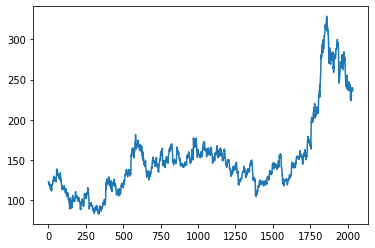

In [7]:
defn_high=defn.reset_index()['High']
plt.plot(defn_high)

In [8]:
sclr = MinMaxScaler(feature_range = (0,1))
defn_high = sclr.fit_transform(np.array(defn_high).reshape(-1,1))

In [9]:
defn_high.shape

(2035, 1)

In [10]:
defn_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [11]:
trainsz = int(len(defn_high) * 0.75)
testsz = len(defn_high) - trainsz
traindata, testdata = defn_high[0:trainsz,:], defn_high[trainsz:len(defn_high),:1]


In [12]:
trainsz,testsz

(1526, 509)

In [13]:
def create_dataset(dataset, tstep = 1):
    dX, dY = [], []
    for i in range(len(dataset) - tstep - 1):
        v = dataset[i:(i+tstep), 0]
        dX.append(v)
        dY.append(dataset[i+tstep, 0])
    return np.array(dX), np.array(dY)

    
tstep = 100
xtrainer, ytrainer = create_dataset(traindata, tstep)
xtester, ytester = create_dataset(testdata, tstep)

In [14]:
xtrainer = xtrainer.reshape(xtrainer.shape[0], xtrainer.shape[1], 1)
xtester = xtester.reshape(xtester.shape[0], xtester.shape[1], 1)


print(xtrainer.shape), print(ytrainer.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [15]:
print(xtester.shape), print(ytester.shape)

(408, 100, 1)
(408,)


(None, None)

In [16]:
mdl = Sequential()
mdl.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
mdl.add(LSTM(50, return_sequences = True))
mdl.add(LSTM(50))
mdl.add(Dense(1))
mdl.compile(loss = 'mean_squared_error', optimizer = 'adam')


mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
mdl.fit(xtrainer, ytrainer, validation_data = (xtester, ytester), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 11s 218ms/step - loss: 0.0104 - val_loss: 0.0366
Epoch 2/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0020 - val_loss: 0.0050
Epoch 3/100
23/23 [==============================] - 5s 234ms/step - loss: 8.3878e-04 - val_loss: 0.0029
Epoch 4/100
23/23 [==============================] - 5s 211ms/step - loss: 7.4686e-04 - val_loss: 0.0030
Epoch 5/100
23/23 [==============================] - 5s 199ms/step - loss: 7.2923e-04 - val_loss: 0.0027
Epoch 6/100
23/23 [==============================] - 5s 219ms/step - loss: 6.8409e-04 - val_loss: 0.0033
Epoch 7/100
23/23 [==============================] - 5s 215ms/step - loss: 6.5175e-04 - val_loss: 0.0030
Epoch 8/100
23/23 [==============================] - 4s 193ms/step - loss: 6.2454e-04 - val_loss: 0.0033
Epoch 9/100
23/23 [==============================] - 4s 191ms/step - loss: 6.1753e-04 - val_loss: 0.0028
Epoch 10/100
23/23 [==============================] - 4s 176ms

In [18]:
trpd = mdl.predict(xtrainer)
tpd = mdl.predict(xtester)


In [19]:
trpd = sclr.inverse_transform(trpd)
tpd = sclr.inverse_transform(tpd)

In [20]:
math.sqrt(mean_squared_error(ytrainer, trpd))

135.94307170915332

In [21]:
math.sqrt(mean_squared_error(ytester, tpd))

226.61659080414276

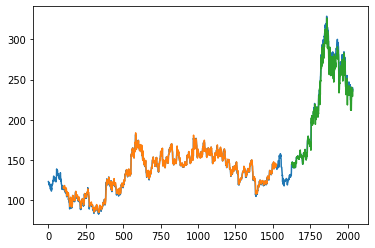

Green indicates the predicted data
Blue indicates the complete data
Orange indicates the trained data


In [22]:
lb = 100
trpdPlot = np.empty_like(defn_high)
trpdPlot[:,:] = np.nan
trpdPlot[lb:len(trpd) + lb, :] = trpd

tpdPlot = np.empty_like(defn_high)
tpdPlot[:,:] = np.nan
tpdPlot[len(trpd) + (lb * 2)+1:len(defn_high) - 1, :] = tpd

plt.plot(sclr.inverse_transform(defn_high))
plt.plot(trpdPlot)
plt.plot(tpdPlot)
plt.show()

print("Green indicates the predicted data")
print("Blue indicates the complete data")
print("Orange indicates the trained data")

In [23]:
len(testdata), xtester.shape

(509, (408, 100, 1))

In [24]:
xinput = testdata[409:].reshape(1,-1)
xinput.shape

(1, 100)

In [25]:
tmpinput = list(xinput)
temp_input = tmpinput[0].tolist()

lstoutput=[]
nossteps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        xinput=np.array(temp_input[1:])
        print("{} day input {}".format(i,xinput))
        xinput=xinput.reshape(1,-1)
        xinput = xinput.reshape((1, nossteps, 1))
        yhat = mdl.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lstoutput.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, nossteps,1))
        yhat = mdl.predict(xinput, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstoutput.extend(yhat.tolist())
        i=i+1
    

print(lstoutput)

[0.6015803]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

In [26]:
dnew = np.arange(1,101)
dpred = np.arange(101,129)

In [27]:
dnew.shape

(100,)

In [28]:
dpred.shape

(28,)

In [29]:
defn3 = defn_high.tolist()
defn3.extend(lstoutput)

len(defn_high)

2035

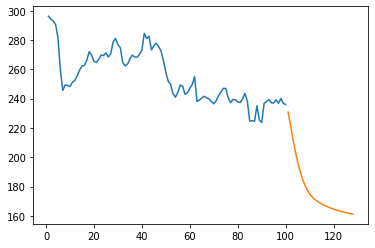

In [30]:
plt.plot(dnew, sclr.inverse_transform(defn_high[1935:]))
plt.plot(dpred, sclr.inverse_transform(lstoutput))

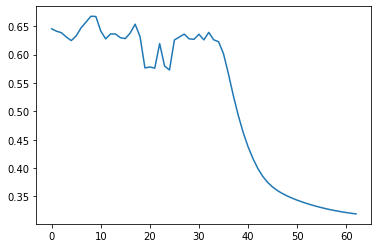

In [31]:
defn3=defn_high.tolist()
defn3.extend(lstoutput)
plt.plot(defn3[2000:])

In [32]:
defn3=sclr.inverse_transform(defn3).tolist()

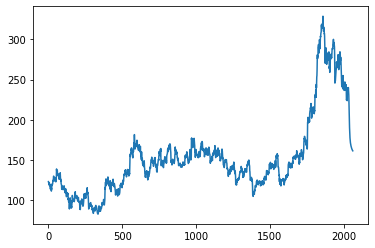

In [33]:
plt.plot(defn3)

CONCLUSION

We have successfully completed a project on stock market prediction and forecasting using stacked LSTM.